In [1]:
import keras
from keras.layers import Input, Conv1D,Activation,MaxPooling1D,Dense,Flatten,UpSampling1D
from keras.layers.normalization import BatchNormalization
from keras.models import Model,load_model
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def get_sub_model(myinputs,channel=3,sensors=1,multi=1):
    x     = Conv1D(filters =8*sensors*multi, kernel_size=5,strides = 1, padding = 'same')(myinputs)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = MaxPooling1D(pool_size=3,strides = 2,padding='same')(x)
    #  x shape is 64X16 =3072
    x     = Conv1D(filters =12*sensors*multi, kernel_size=3,strides = 1, padding = 'same')(x)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = MaxPooling1D(pool_size=2,strides = 2,padding='same')(x)
    #  x shape is 32X24 = 2048
    x     = Conv1D(filters =16*sensors*multi, kernel_size=3,strides = 1, padding = 'same')(x)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = MaxPooling1D(pool_size=2,strides = 2,padding='same')(x)
    # x shape is 16*32 = 1536
    x     = Conv1D(filters =20*sensors*multi, kernel_size=3,strides = 1, padding = 'same')(x)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = MaxPooling1D(pool_size=2,strides = 2,padding='same')(x)
    # x shape is 8*32 = 1024
    x     = Conv1D(filters =24*sensors, kernel_size=3,strides = 2, padding = 'same')(x)
    # x shape is 4*32 = 512

    latent_vector = Flatten()(x)
    # decoder x = 4*128
    x     = Conv1D(filters =24*sensors*multi, kernel_size=3,strides = 1, padding = 'same')(x)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = UpSampling1D(2)(x)
    # x shape is 8*128
    x     = Conv1D(filters =20*sensors*multi, kernel_size=3,strides = 1, padding = 'same')(x)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = UpSampling1D(2)(x)
    # x shape is 16*96
    x     = Conv1D(filters =16*sensors*multi, kernel_size=3,strides = 1, padding = 'same')(x)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = UpSampling1D(2)(x)
    # x shape is 32*64
    x     = Conv1D(filters =12*sensors*multi, kernel_size=3,strides = 1, padding = 'same')(x)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = UpSampling1D(2)(x)
    # x shape is 64*48
    x     = Conv1D(filters =8*sensors*multi, kernel_size=3,strides = 1, padding = 'same')(x)
    x     = BatchNormalization()(x) 
    x     = Activation('relu')(x)
    x     = UpSampling1D(2)(x)
    # x shape is 128*48
    y     = Conv1D(filters =channel, kernel_size=3,strides = 1, padding = 'same')(x)
    #y     = Activation('relu')(x)
    return latent_vector,y

In [3]:
def build_model(name="push_detect",channel=3,sensors=1,multi=1):
    # input shape 128X26 =3382
    with tf.name_scope(name):
        myInputs = Input(shape=(128,channel))
                
        LV,Y = get_sub_model(myInputs,channel=channel,sensors=sensors,multi=multi)
        
        autoencoder = Model (inputs=myInputs,
                             outputs =Y)
    
    return autoencoder

In [30]:
fullModel=build_model(channel=26,sensors=8,multi=4)

In [2]:
fullModel=load_model('lstmModel.h5')

In [3]:
fullModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 26)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 768)               2442240   
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 128, 768)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128, 768)          4721664   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 128, 26)           19994     
Total params: 7,183,898
Trainable params: 7,183,898
Non-trainable params: 0
_________________________________________________________________


In [6]:
opt = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.000, nesterov=False)
fullModel.compile(optimizer=opt,loss='mse',metrics=['accuracy'])
#fullModel.summary()

In [88]:
opt = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.000, nesterov=False)
gyroModel.compile(optimizer=opt,loss='mae',metrics=['accuracy'])
opt = keras.optimizers.SGD(lr=.1, momentum=0.0, decay=0.000, nesterov=False)
linearAccModel.compile(optimizer=opt,loss='mae',metrics=['accuracy'])
opt = keras.optimizers.SGD(lr=.1, momentum=0.0, decay=0.000, nesterov=False)
gravityModel.compile(optimizer=opt,loss='mae',metrics=['accuracy'])
opt = keras.optimizers.SGD(lr=.1, momentum=0.0, decay=0.000, nesterov=False)
gameVecModel.compile(optimizer=opt,loss='mae',metrics=['accuracy'])

In [81]:
#data= np.load('watch_norm_32_4_29.npy')
data= np.load(r'C:\Users\Guo\Downloads\WatchData (28).npy')

#np.random.shuffle(data)
p=1#0.85
train_num =int(data.shape[0]*p)
data_train=data[:train_num,:,:]
y=np.flip(data_train,1)
z=np.zeros((y.shape[0],1,y.shape[2]))
X2 = np.concatenate((z,y[:,:-1,:]),axis=1)
#gyro_train=data[:train_num,:,0:3]
#linearAcc_train=data[:train_num,:,3:6]
#gravity_train=data[:train_num,:,6:9]
#gameVec_train=data[:train_num,:,9:13]

#gyro_test =data[train_num:,:,0:3]
#linearAcc_test =data[train_num:,:,3:6]
#gravity_test =data[train_num:,:,6:9]
#gameVec_test =data[train_num:,:,9:13]

In [14]:
train_round =10
epochs_per_round=20
for i in range(train_round):
    print('start training round '+str(i))
    print('training full model')
    fullModel.fit(data_train,data_train,
                  batch_size=256,
                  epochs=(i+1)*epochs_per_round,
                  validation_split=0.1,verbose=1,initial_epoch=i*epochs_per_round)
    fullModel.save('fullModel.h5')

start training round 0
training full model
Train on 8564 samples, validate on 952 samples
Epoch 1/20
8564/8564 [==============================] - 188s 22ms/step - loss: 0.0032 - acc: 0.8007 - val_loss: 0.0030 - val_acc: 0.8074
Epoch 2/20
8564/8564 [==============================] - 173s 20ms/step - loss: 0.0031 - acc: 0.8006 - val_loss: 0.0030 - val_acc: 0.8211
Epoch 3/20
8564/8564 [==============================] - 171s 20ms/step - loss: 0.0031 - acc: 0.8044 - val_loss: 0.0029 - val_acc: 0.8238
Epoch 4/20
8564/8564 [==============================] - 172s 20ms/step - loss: 0.0031 - acc: 0.8050 - val_loss: 0.0029 - val_acc: 0.8266
Epoch 5/20
8564/8564 [==============================] - 174s 20ms/step - loss: 0.0031 - acc: 0.8036 - val_loss: 0.0031 - val_acc: 0.8257
Epoch 6/20
8564/8564 [==============================] - 173s 20ms/step - loss: 0.0031 - acc: 0.8046 - val_loss: 0.0030 - val_acc: 0.8210
Epoch 7/20
8564/8564 [==============================] - 171s 20ms/step - loss: 0.0031 - 

KeyboardInterrupt: 

In [4]:
#fullModel=load_model('lstm_auto.h5')
fullModel=load_model('lstm_auto_128Units.h5')
#fullModel=load_model('vae.h5')
#fullModel=load_model('lstmModel.h5')
#fullModel=load_model('fullModel.h5')
#fullModel=load_model('fullModel_2sensors.h5')
#fullModel=load_model('ConvLstmModel_2.h5')

In [60]:
fullModel.layers[2].output

[<tf.Tensor 'lstm_1_5/TensorArrayReadV3:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'lstm_1_5/while/Exit_3:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'lstm_1_5/while/Exit_4:0' shape=(?, 128) dtype=float32>]

In [5]:
lstm_auto_encoder=Model(inputs =fullModel.input[0],outputs=fullModel.layers[2].output[1:3])

In [6]:
lstm_auto_encoder.summary()
lstm_auto_encoder.save('lstm_auto_encoder_128Units.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 18)            0         
_________________________________________________________________
lstm_1 (LSTM)                [(None, 128), (None, 128) 75264     
Total params: 75,264
Trainable params: 75,264
Non-trainable params: 0
_________________________________________________________________


In [8]:
data=np.load(r'C:\Users\Guo\Downloads\PSDSData (2)_bf7ff952e4163201_norm.npy')
print(data.shape)

(3209, 32, 18)


In [9]:
full_LV=lstm_auto_encoder.predict(data)

In [17]:
full_LV=np.append(full_LV[0],full_LV[1],axis=1)
full_LV.shape

(3209, 256)

In [21]:
np.save('LV_xing',full_LV)
np.savetxt('rawFromTrain_xing.csv',data[:,0,:])

In [69]:
fullModel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 18)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 32, 18)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 128), (None, 75264       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 32, 128), (N 75264       input_2[0][0]                    
                                                                 lstm_1[0][1]                     
          

In [4]:
def lstm_restore(model):
    encoder_inputs = model.input[0]   # input_1
    decoder_inputs = model.input[1]   # input_2
    
    #encoder_model = Model(encoder_inputs, encoder_states)
    decoder_lstm = model.layers[3]
    
    decoder_dense = model.layers[4]
    
    encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output   # lstm_1
    encoder_states = [state_h_enc, state_c_enc]
    
    decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
        decoder_inputs, initial_state=encoder_states)
    
    decoder_outputs = decoder_dense(decoder_outputs)
    
        
    full_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    return full_model


In [5]:
fullModel_restore=lstm_restore(fullModel)
fullModel_restore.summary()
fullModel_restore.compile(optimizer = 'adam', loss='mse')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 26)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 128, 26)      0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 768), (None, 2442240     input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 128, 768), ( 2442240     input_2[0][0]                    
                                                                 lstm_1[0][1]                     
          

In [83]:
loss=fullModel.evaluate([data_train,X2],y)
print(loss)

19415/19415 [==============================] - 16s 827us/step
[0.01477989631580506, 0.6848763842482005]


In [15]:
loss_sample= fullModel.evaluate([data_train[sample].reshape(1,128,26),X2[sample].reshape(1,128,26)],y[sample].reshape(1,128,26))
print(loss_sample)

1/1 [==============================] - 0s 159ms/step
[0.006168585270643234, 0.703125]


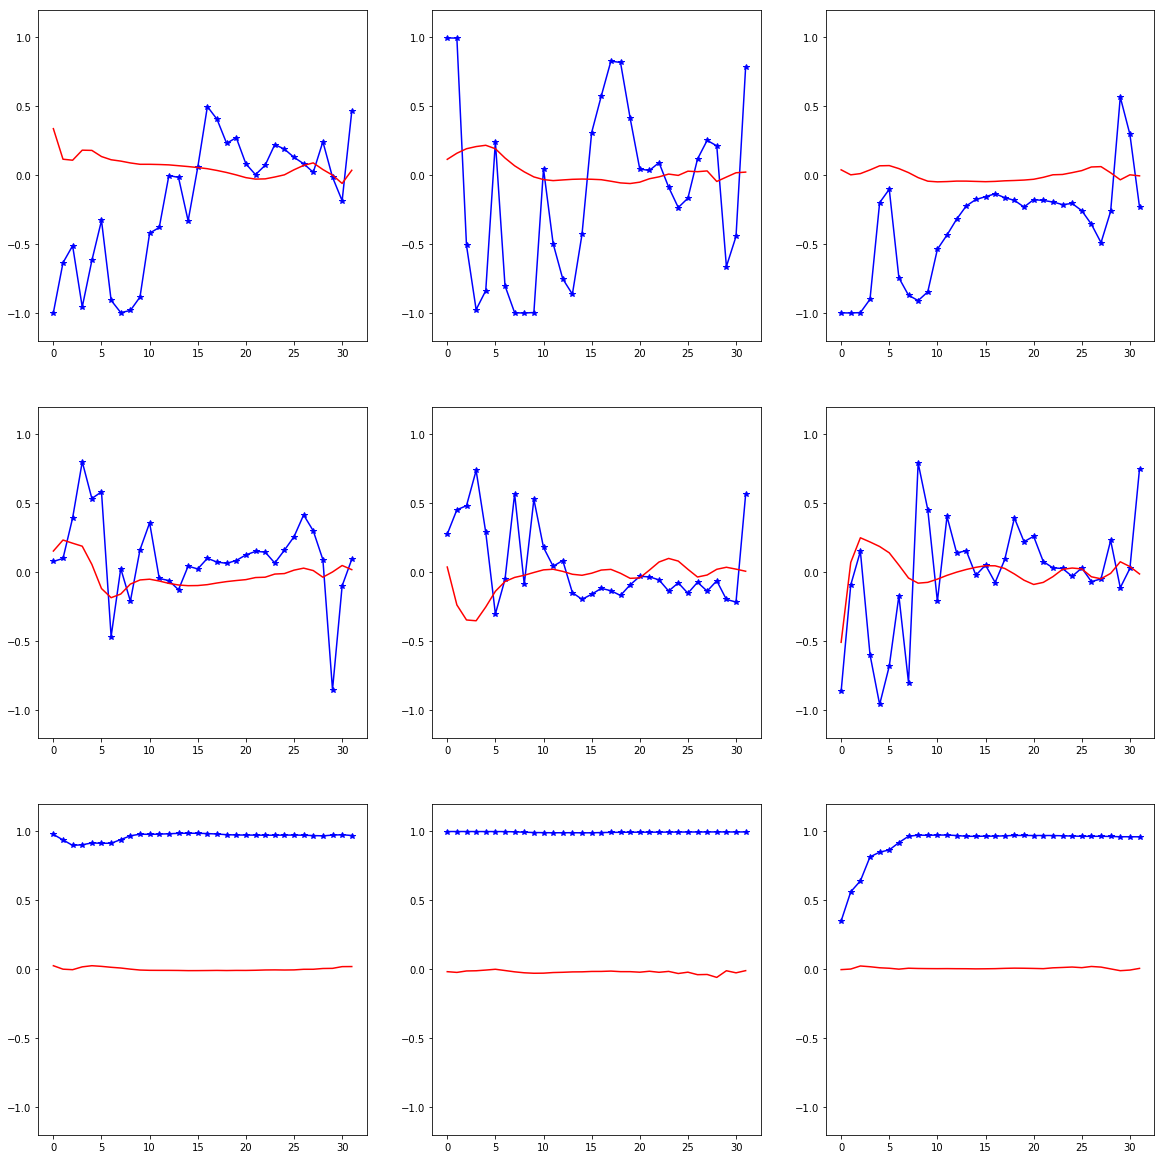

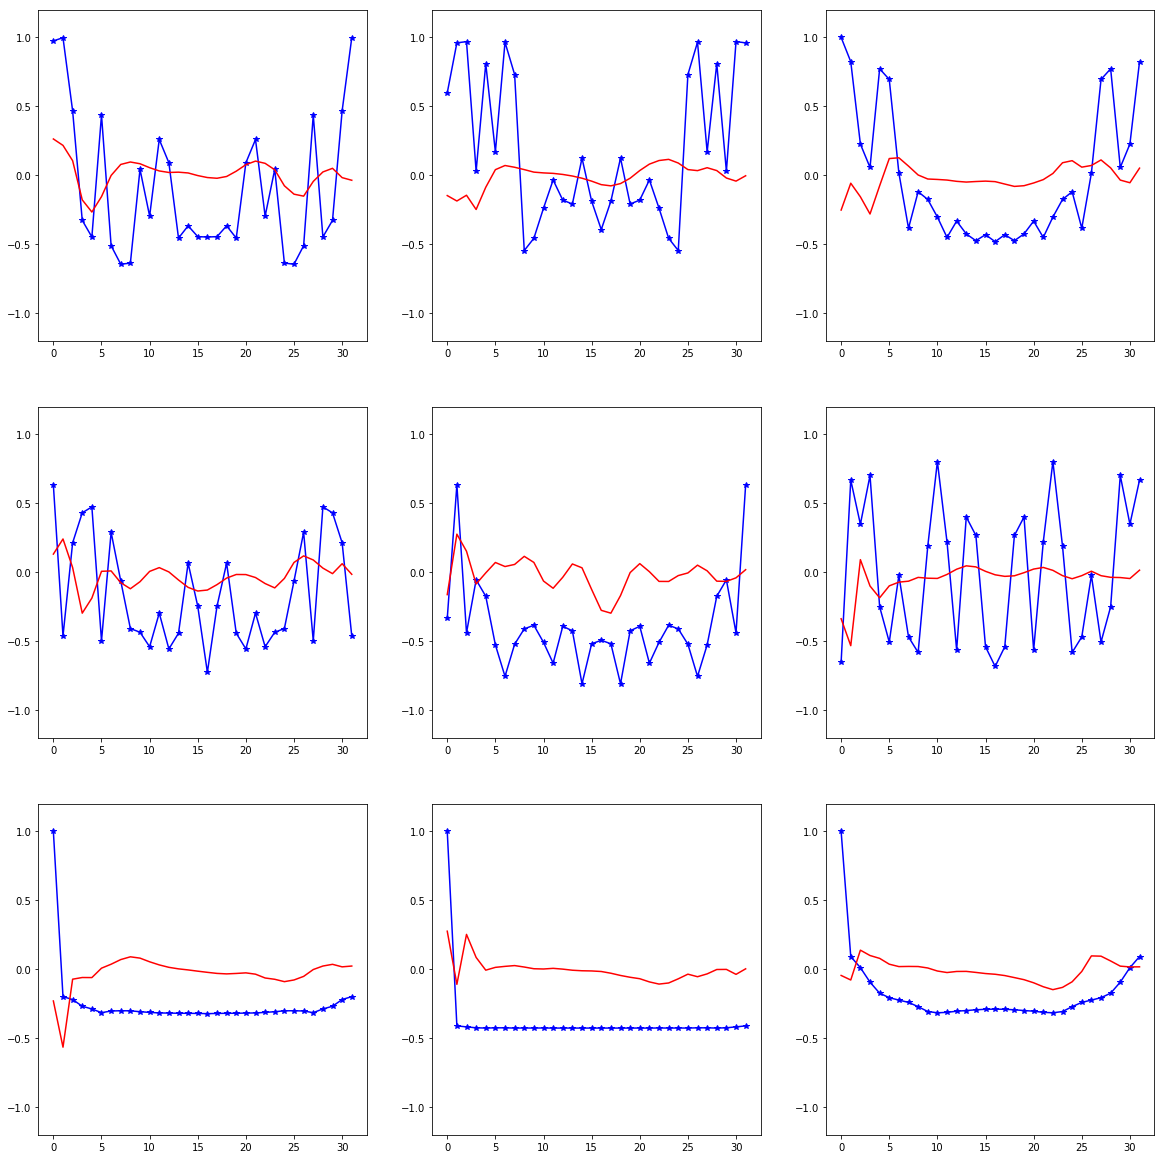

In [91]:
sample = 111
fully = fullModel.predict([data_train[sample].reshape(1,32,18),X2[sample].reshape(1,32,18)])
#loss_sample= fullModel.evaluate([data_train[sample].reshape(1,128,26),X2[sample].reshape(1,128,26)],y[sample].reshape(1,128,26))
#fully = fullModel.predict([data_train[sample].reshape(1,32,18)])
fully = np.flip(fully,axis=1)
fig=plt.figure(figsize=(20,28))
for channel in range(9):
    plt.subplot(4,3,channel+1)
    
    plot(data_train[sample,:,channel],'b*-')
    
    plot(fully[0,:,channel],'r')
    plt.ylim((-1.2, 1.2))
fig=plt.figure(figsize=(20,28))
for channel in range(9):
    plt.subplot(4,3,channel+1)
    
    plot(data_train[sample,:,channel+9],'b*-')
    plot(fully[0,:,channel+9],'r')
    plt.ylim((-1.2, 1.2))


In [24]:
fully.shape

(1, 128, 26)

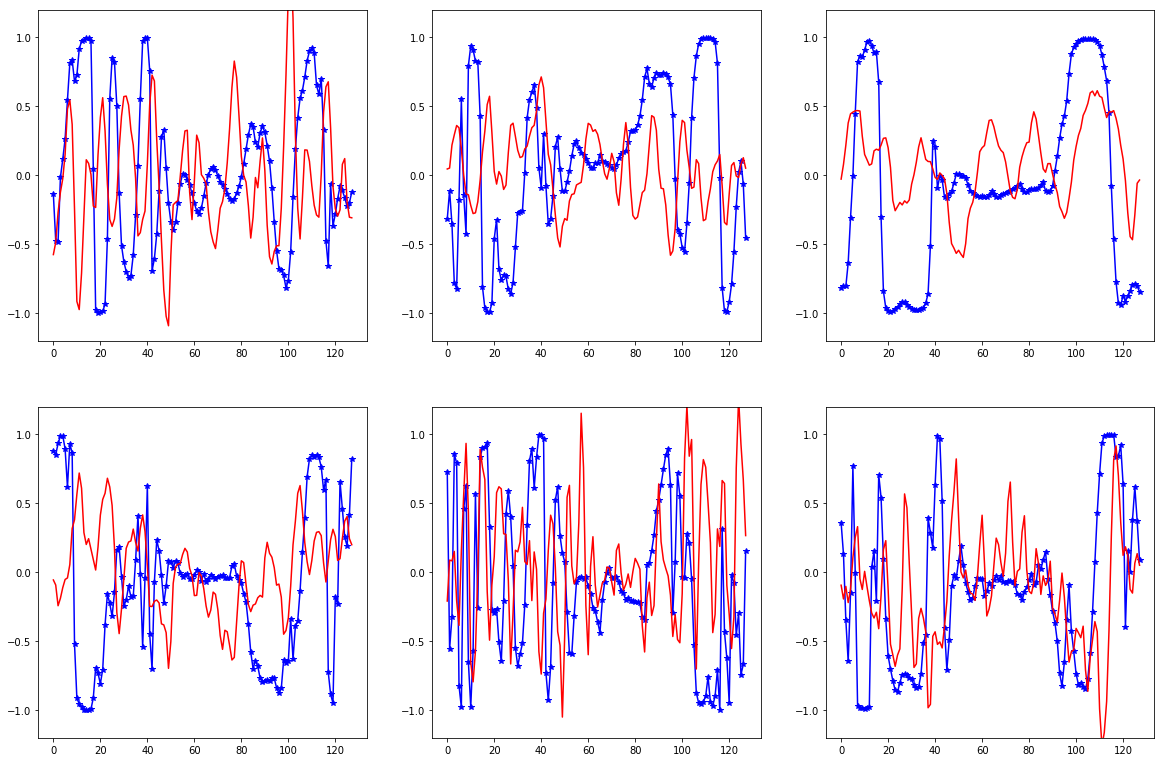

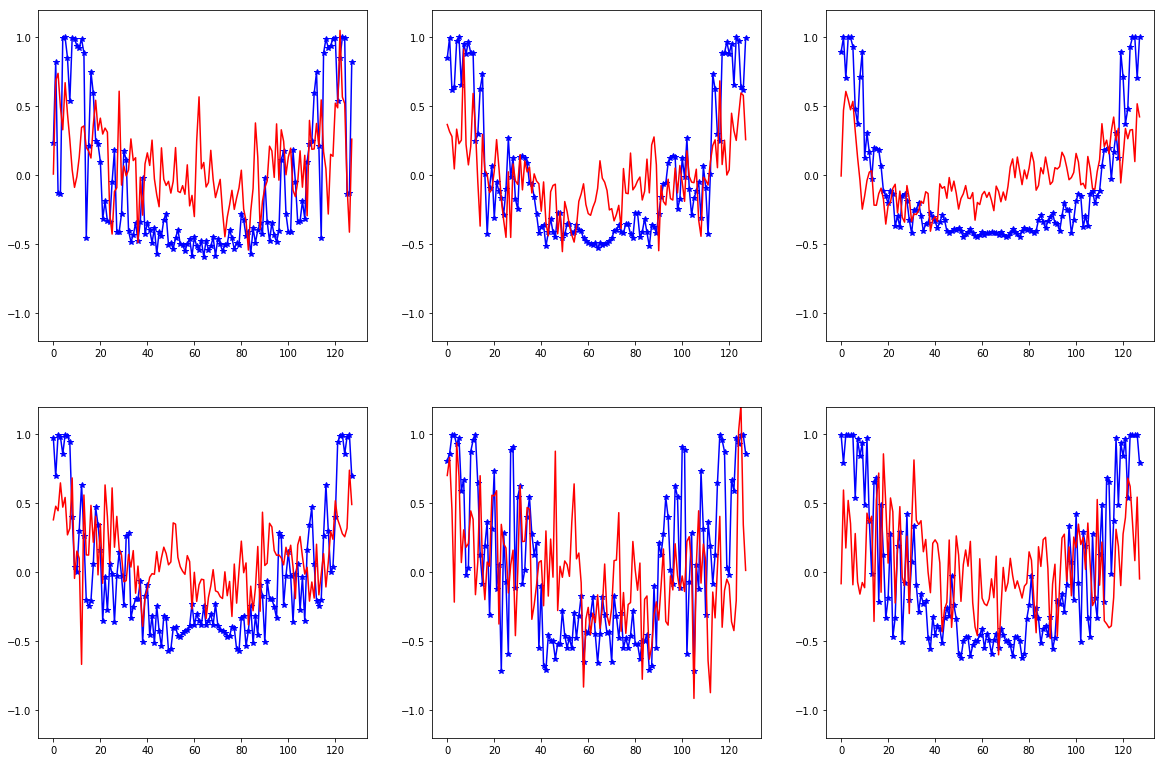

In [8]:
sample = 188
index=[0,1,2,3,4,5,13,14,15,16,17,18]
fully = fullModel.predict(data_train[sample,:,index].reshape(1,128,12))

fig=plt.figure(figsize=(20,28))
for channel in range(6):
    plt.subplot(4,3,channel+1)
    
    plot(data_train[sample,:,channel],'b*-')
    
    plot(fully[0,:,channel],'r')
    plt.ylim((-1.2, 1.2))
fig=plt.figure(figsize=(20,28))
for channel in range(6):
    plt.subplot(4,3,channel+1)
    
    plot(data_train[sample,:,channel+13],'b*-')
    plot(fully[0,:,channel+6],'r')
    plt.ylim((-1.2, 1.2))


In [72]:
loss=fullModel.evaluate(data[sample:sample+1,:,index],data[sample:sample+1,:,index])

1/1 [==============================] - 0s 66ms/step


In [73]:
loss

[0.008758298121392727, 0.84375]

In [ ]:
train_round =1
epochs_per_round=20
for i in range(train_round):
    print('start training round '+str(i))
    print('training gyro model')
    gyroModel.fit(gyro_train,gyro_train,
                  batch_size=256,
                  epochs=(i+1)*epochs_per_round,
                  validation_split=0.1,verbose=1,initial_epoch=i*epochs_per_round)
    print('training linearAcc model')
    linearAccModel.fit(linearAcc_train,linearAcc_train,
                       batch_size=256,
                       epochs=(i+1)*epochs_per_round,validation_split=0.1,verbose=1,initial_epoch=i*epochs_per_round)
    print('training gravity model')
    gravityModel.fit(gravity_train,gravity_train,
                     batch_size=256,
                     epochs=(i+1)*epochs_per_round,validation_split=0.1,verbose=1,initial_epoch=i*epochs_per_round)
    print('training gameVec model')
    gameVecModel.fit(gameVec_train,gameVec_train,
                     batch_size=256,
                     epochs=(i+1)*epochs_per_round,validation_split=0.1,verbose=1,initial_epoch=i*epochs_per_round)
    gyroModel.save('gyroNorModel.h5')
    linearAccModel.save('linearAccNorModel.h5')
    gravityModel.save('gravityNorModel.h5')
    gameVecModel.save('gameVecNorModel.h5')

start training round 0
training gyro model
Train on 8564 samples, validate on 952 samples
Epoch 1/20
8564/8564 [==============================] - 8s 927us/step - loss: 0.0578 - acc: 0.4527 - val_loss: 0.0582 - val_acc: 0.4798
Epoch 2/20
8564/8564 [==============================] - 8s 915us/step - loss: 0.0571 - acc: 0.4591 - val_loss: 0.0579 - val_acc: 0.4653
Epoch 3/20
8564/8564 [==============================] - 8s 913us/step - loss: 0.0567 - acc: 0.4551 - val_loss: 0.0566 - val_acc: 0.4976
Epoch 4/20
8564/8564 [==============================] - 8s 924us/step - loss: 0.0561 - acc: 0.4538 - val_loss: 0.0563 - val_acc: 0.4580
Epoch 5/20
8564/8564 [==============================] - 8s 919us/step - loss: 0.0559 - acc: 0.4627 - val_loss: 0.0562 - val_acc: 0.4652
Epoch 6/20
8564/8564 [==============================] - 8s 931us/step - loss: 0.0554 - acc: 0.4674 - val_loss: 0.0571 - val_acc: 0.4858
Epoch 7/20
8564/8564 [==============================] - 8s 916us/step - loss: 0.0552 - acc: 0.

In [92]:
print("gyroModel Test:"+str(gyroModel.evaluate(gyro_test,gyro_test)))
print("linearAccModel Test: "+str(linearAccModel.evaluate(linearAcc_test,linearAcc_test)))
print("gravityModel Test: "+str(gravityModel.evaluate(gravity_test,gravity_test)))
print("gameVecModel Test: "+str(gameVecModel.evaluate(gameVec_test,gameVec_test)))

1680/1680 [==============================] - 1s 649us/step
gyroModel Test:[0.05690161458083561, 0.4774507068452381]
1680/1680 [==============================] - 1s 586us/step
linearAccModel Test: [0.04230747339980943, 0.763760230654762]
1680/1680 [==============================] - 1s 602us/step
gravityModel Test: [0.0519733981362411, 0.9672433035714286]
1680/1680 [==============================] - 1s 603us/step
gameVecModel Test: [0.05747344266800653, 0.8700241815476191]


In [18]:
sample = 1
gyroy = gyroModel.predict(gyro_train[sample].reshape(1,128,3))
fig=plt.figure(figsize=(20,7))
for channel in range(3):
    plt.subplot(1,3,channel+1)
    plot(gyro_train[sample,:,channel],'b')
    plot(gyroy[0,:,channel],'r')
linearAccy = linearAccModel.predict(linearAcc_train[sample].reshape(1,128,3))
fig=plt.figure(figsize=(20,7))
for channel in range(3):
    plt.subplot(1,3,channel+1)
    plot(linearAcc_train[sample,:,channel],'b')
    plot(linearAccy[0,:,channel],'r')
gravityy = gravityModel.predict(gravity_train[sample].reshape(1,128,3))
fig=plt.figure(figsize=(20,7))
for channel in range(3):
    plt.subplot(1,3,channel+1)
    plot(gravity_train[sample,:,channel],'b')
    plot(gravityy[0,:,channel],'r')
gameVecy = gameVecModel.predict(gameVec_train[sample].reshape(1,128,4))
fig=plt.figure(figsize=(20,7))
for channel in range(4):
    plt.subplot(1,4,channel+1)
    plot(gameVec_train[sample,:,channel],'b')
    plot(gameVecy[0,:,channel],'r')

NameError: name 'gyroModel' is not defined